In [26]:
# Classification binaire sur Iris

#Chargement des données Iris (binaire)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris



In [19]:
# preparation des données
# Charger Iris
X, y = load_iris(return_X_y=True)

# Binarisation : Setosa (1) vs autres (-1)
y = np.where(y == 0, 1, -1)
# Standardisation 
X = (X - X.mean(axis=0)) / X.std(axis=0)

n, d = X.shape


In [20]:
#2️- Fonction de perte logistique (vue au cours)

def logistic_loss(w, X, y):
    z = y * (X @ w)
    return np.mean(np.log(1 + np.exp(-z)))

#3️- Gradient stochastique (1 échantillon)

def stochastic_gradient(w, x_i, y_i):
    return -(y_i * x_i) / (1 + np.exp(y_i * (x_i @ w)))

#4️- Algorithme SGD
def sgd(X, y, alpha0=0.1, n_iter=2000):
    w = np.zeros(X.shape[1])
    losses = []

    for k in range(n_iter):
        i = np.random.randint(len(y))  # tirage aléatoire
        grad = stochastic_gradient(w, X[i], y[i])
        alpha = alpha0 / (1 + k)       # pas décroissant
        w -= alpha * grad
        losses.append(logistic_loss(w, X, y))

    return w, losses

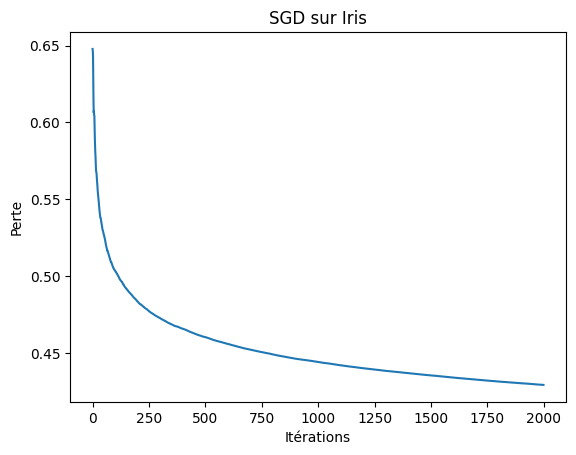

In [21]:

#Exécution & courbe
w_sgd, loss_sgd = sgd(X, y)

plt.plot(loss_sgd)
plt.xlabel("Itérations")
plt.ylabel("Perte")
plt.title("SGD sur Iris")
plt.show()


In [22]:
# PARTIE 2 — Régression sur California Housing
#Exercice 2 — Importance de la standardisation
#1️- Chargement des données
from sklearn.datasets import fetch_california_housing

X, y = fetch_california_housing(return_X_y=True)

#2️- Perte quadratique (MSE)
def mse_loss(w, X, y):
    return 0.5 * np.mean((X @ w - y) ** 2)

def mse_gradient(w, X, y):
    return (X.T @ (X @ w - y)) / X.shape[0]

#3️- Gradient Descent (Batch GD)
def gradient_descent(X, y, alpha=0.01, n_iter=300):
    w = np.zeros(X.shape[1])
    losses = []

    for _ in range(n_iter):
        w -= alpha * mse_gradient(w, X, y)
        losses.append(mse_loss(w, X, y))

    return w, losses

#4️- Sans standardisation ❌
w_raw, loss_raw = gradient_descent(X, y)

#5️- Avec standardisation ✅
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

w_scaled, loss_scaled = gradient_descent(X_scaled, y)


C:\Users\PC\AppData\Local\Temp\ipykernel_17356\305152666.py:10: RuntimeWarning: overflow encountered in square
  return 0.5 * np.mean((X @ w - y) ** 2)
c:\Users\PC\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\_methods.py:136: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\PC\AppData\Local\Temp\ipykernel_17356\305152666.py:13: RuntimeWarning: overflow encountered in matmul
  return (X.T @ (X @ w - y)) / X.shape[0]
C:\Users\PC\AppData\Local\Temp\ipykernel_17356\305152666.py:21: RuntimeWarning: invalid value encountered in subtract
  w -= alpha * mse_gradient(w, X, y)


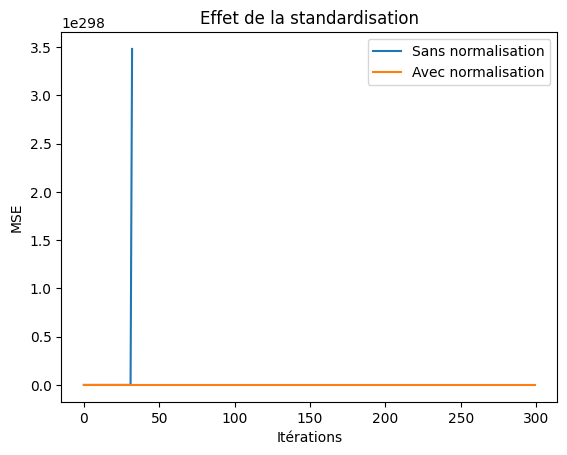

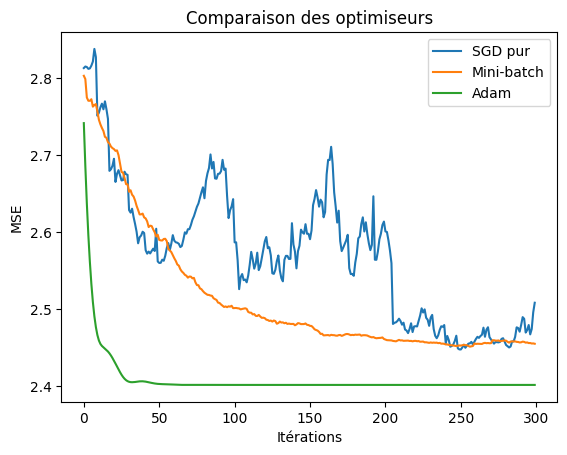

In [23]:
#6️-Comparaison
plt.plot(loss_raw, label="Sans normalisation")
plt.plot(loss_scaled, label="Avec normalisation")
plt.legend()
plt.xlabel("Itérations")
plt.ylabel("MSE")
plt.title("Effet de la standardisation")
plt.show()

# Exercice 3 — Mini-batch & Optimiseurs modernes
#1️- Mini-batch Gradient Descent
def mini_batch_gd(X, y, alpha=0.01, batch_size=32, n_iter=300):
    n, d = X.shape
    w = np.zeros(d)
    losses = []

    for _ in range(n_iter):
        idx = np.random.choice(n, batch_size, replace=False)
        grad = (X[idx].T @ (X[idx] @ w - y[idx])) / batch_size
        w -= alpha * grad
        losses.append(mse_loss(w, X, y))

    return w, losses

#2️-Adam (optimiseur adaptatif)
def adam(X, y, alpha=0.05, beta1=0.9, beta2=0.999, eps=1e-8, n_iter=300):
    w = np.zeros(X.shape[1])
    m = np.zeros_like(w)
    v = np.zeros_like(w)
    losses = []

    for t in range(1, n_iter + 1):
        grad = mse_gradient(w, X, y)
        m = beta1 * m + (1 - beta1) * grad
        v = beta2 * v + (1 - beta2) * grad**2

        m_hat = m / (1 - beta1**t)
        v_hat = v / (1 - beta2**t)

        w -= alpha * m_hat / (np.sqrt(v_hat) + eps)
        losses.append(mse_loss(w, X, y))

    return w, losses

#3️-Comparaison finale
_, loss_sgd = mini_batch_gd(X_scaled, y, batch_size=1)
_, loss_mb = mini_batch_gd(X_scaled, y, batch_size=32)
_, loss_adam = adam(X_scaled, y)

plt.plot(loss_sgd, label="SGD pur")
plt.plot(loss_mb, label="Mini-batch")
plt.plot(loss_adam, label="Adam")
plt.legend()
plt.xlabel("Itérations")
plt.ylabel("MSE")
plt.title("Comparaison des optimiseurs")
plt.show()
